<a href="https://colab.research.google.com/github/achintyaakumar/DepthSense/blob/main/DenseDepth_NYU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clone the repository**


In [ ]:
!git clone https://github.com/ialhashim/DenseDepth.git

fatal: destination path 'DenseDepth' already exists and is not an empty directory.


**Download pre-trained model**

In [ ]:
!wget https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5 -O ./nyu.h5

--2020-10-15 23:15:10--  https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.98.3
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.98.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172897376 (165M) [application/h5]
Saving to: ‘./nyu.h5’

./nyu.h5            100%[===================>] 164.89M  21.5MB/s    in 8.5s    

2020-10-15 23:15:19 (19.5 MB/s) - ‘./nyu.h5’ saved [172897376/172897376]



**Helper function to resize images to (width 640, height 480) for nyu.h5 trained model**

In [ ]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

def preprocess_img(img_path):
  """
  The input image(s) is opened using PIL, the A-channel is removed (if it exists), 
  and the pixel values are normalized into the range 0-1.

  INPUT:
    a list of image path(s).

  OUTPUT:
    a numpy array of the stacked images.
  """
  loaded_images = []
  for file1 in img_path:
    img = Image.open(file1).resize((640, 480))
    img = np.asarray(img, dtype=float)[:, :, 0:3]
    x = np.clip(img / 255, 0, 1)
    loaded_images.append(x)
  inputs = np.stack(loaded_images, axis=0)
  return inputs

**Import libraries and load model**

In [ ]:
import os
import glob
import argparse
import matplotlib
import numpy as np
from PIL import Image

# Keras / TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'
from keras.models import load_model
from layers import BilinearUpSampling2D
from utils import predict, load_images, display_images
from matplotlib import pyplot as plt

# # Argument Parser
# parser = argparse.ArgumentParser(description='High Quality Monocular Depth Estimation via Transfer Learning')
# parser.add_argument('--model', default='nyu.h5', type=str, help='Trained Keras model file.')
# parser.add_argument('--input', default='examples/*.png', type=str, help='Input filename or folder.')
# args = parser.parse_args()

# Custom object needed for inference and training
custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}

print('Loading model...')

# Load model into GPU / CPU
model = load_model('nyu.h5', custom_objects=custom_objects, compile=False)

Loading model...


**Upload images from your device and predict depth**

In [ ]:
import cv2

file_paths = upload_files()

inputs = preprocess_img(file_paths)

print('\nLoaded ({0}) images of size {1}.'.format(inputs.shape[0], inputs.shape[1:]))

# Compute results
outputs = predict(model, inputs)

#matplotlib problem on ubuntu terminal fix
#matplotlib.use('TkAgg')   
#depth_color_image = cv2.applyColorMap(np.round(np.squeeze(outputs)*255).astype(np.uint8), cv2.COLORMAP_JET)
#input = np.squeeze(inputs)[:,:,[2,1,0]]*255
#depth = cv2.resize(depth_color_image[:,:,[2,1,0]],(640,480), interpolation = cv2.INTER_AREA)
#cv2.imwrite('original.jpg',input.astype(np.uint8) )
#cv2.imwrite('depth.jpg', depth)

#print(input.shape)
#print(depth.shape)

#combined_image = cv2.addWeighted(input.astype(np.uint8),0.15,depth,0.85,0)
#cv2.imwrite('combined.jpg', combined_image)


Saving apple1.jpg to apple1 (2).jpg

Loaded (1) images of size (480, 640, 3).


**See result**

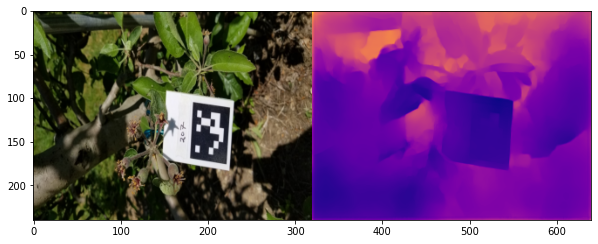

In [ ]:
viz = display_images(outputs.copy(), inputs.copy())
plt.figure(figsize=(10,5))
plt.imshow(viz)
plt.savefig('test.png')
plt.show()